To run the following code, download the data spreadsheet from the zipped file and put it into your google drive (outside of any folders)

The following link is to a video of the interactive part of the code:
https://youtu.be/2YICIOAFBsw

This is a link to this Colab Document: https://colab.research.google.com/drive/1TIYJTesHo_EfYoIsP_5jLjyJJeae8iTk#scrollTo=uktDaaOavd0K

In [ ]:
# Imports and Google Drive Mount

from google.colab import drive
import array
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Find Data File

filename = 'SAVANT DATA FINAL.xlsx'
search_path = '/content/drive/MyDrive'

for root,dirs,files in os.walk(search_path):
  if filename in files:
    file_path = os.path.join(root,filename)
    break

In [ ]:
# Read Data File from Drive

dataSet = pd.read_excel(file_path)

In [ ]:
# Show First Rows of Data File

dataSet.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2023-05-29,103.6,-1.88,6.14,"Abreu, José",547989,661395,single,hit_into_play,...,5,5,5,5,5,Standard,Standard,223.0,0.074,0.313
1,SI,2023-03-30,102.9,-2.03,6.11,"Guerrero Jr., Vladimir",665489,663855,single,hit_into_play,...,7,8,7,8,7,Standard,Standard,219.0,-0.226,1.040
2,SI,2023-06-03,102.8,-1.70,5.96,"Castro, Rodolfo",666801,663855,single,hit_into_play,...,1,1,4,4,1,Standard,Standard,217.0,0.009,0.256
3,FF,2023-06-02,102.7,-1.89,6.12,"Straw, Myles",664702,661395,single,hit_into_play,...,1,0,1,0,1,Strategic,Standard,219.0,-0.043,0.139
4,FF,2023-05-27,102.6,-2.11,6.03,"Guerrero Jr., Vladimir",665489,661395,single,hit_into_play,...,8,4,8,4,8,Standard,Standard,226.0,-0.013,0.271


In [ ]:
## CLEANING DATA SET
cleanSet = dataSet.to_numpy()
EV = []
LA = []
ISO = []
for ir in range(15231):
      EV.append(cleanSet[ir,53])
      LA.append(cleanSet[ir,54])
      ISO.append(cleanSet[ir,74])
print(EV)
print(LA)
print(ISO)



[109.7, 71.0, 107.3, 101.2, 82.1, 100.8, 96.0, 93.6, 70.7, 90.4, 77.9, 83.8, 102.7, 103.2, 111.1, 113.7, 97.1, 55.0, 106.3, 107.0, 97.6, 66.2, 100.6, 104.4, 98.3, 101.4, 80.9, 89.9, 81.2, 95.5, 26.4, 97.7, 71.4, 92.1, 92.5, 77.7, 103.4, 99.6, 108.0, 104.6, 75.7, 108.7, 97.6, 63.8, 109.5, 99.0, 96.6, 106.9, 87.7, 98.9, 77.2, 74.9, 102.0, 110.0, 69.5, 100.3, 85.8, 79.3, 112.4, 107.8, 100.3, 99.8, 106.0, 44.5, 96.2, 98.1, 104.0, 92.4, 93.4, 67.9, 110.1, 98.6, 104.1, 75.9, 112.2, 84.2, 70.6, 106.6, 105.0, 99.2, 67.4, 100.3, 99.0, 78.8, 101.4, 98.9, 102.9, 91.6, 68.6, 89.9, nan, 114.3, 93.0, 105.1, 99.5, 105.9, 85.7, 79.7, 72.8, 72.7, 107.4, 87.2, 88.4, 103.2, 89.1, 107.9, 93.4, 94.3, 105.8, 96.5, 110.0, 105.8, 66.0, 98.5, 81.8, 103.4, 100.5, 86.2, 102.7, 98.2, 80.5, 88.1, 107.9, 94.2, 96.7, 99.1, 96.4, 75.7, 80.7, 99.3, 94.1, nan, 93.6, 72.5, 110.7, 106.7, 77.5, 78.7, 68.2, 101.5, 95.7, 103.0, 103.9, 97.6, 103.1, 89.0, 57.7, 100.9, 90.4, 102.3, 84.7, 106.1, 112.4, 90.9, 101.8, 100.6, 102.2

15193
[0. 0. 0. ... 0. 0. 0.]
[[109.7   3.    0. ]
 [ 71.   22.    0. ]
 [107.3   4.    0. ]
 ...
 [102.9  24.    1. ]
 [ 95.6   0.    0. ]
 [ 78.4  11.    0. ]]
[109.7  71.  107.3 ... 102.9  95.6  78.4]
[0. 0. 0. ... 0. 0. 0.]
[[0.16268786]]
[-18.18602345]


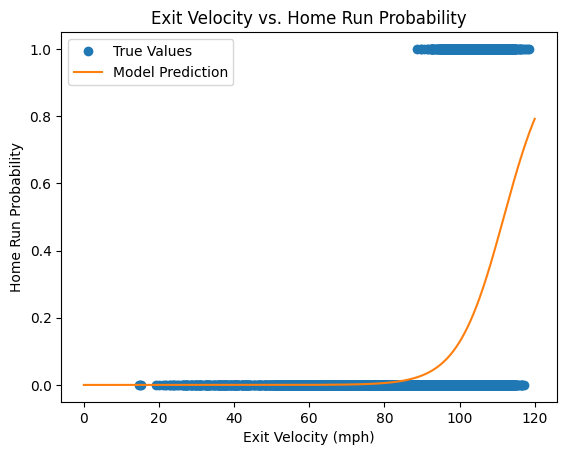

[[ 1.35733659 -0.02142893]]
[-20.72522204]


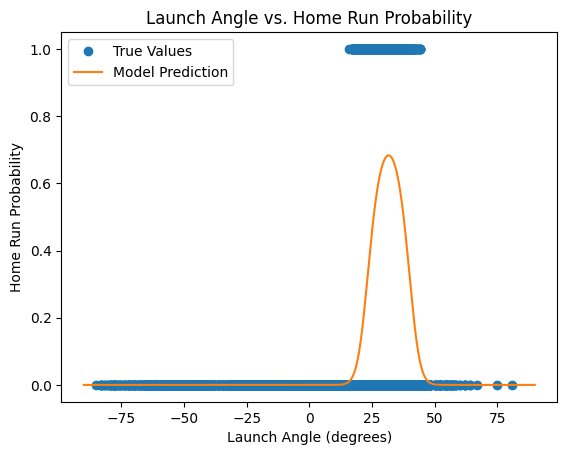

In [ ]:
 from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,penalty=None)

goodValues = array.array('i', [])

for i in range(15231):
    if(math.isnan(EV[i]) == False and math.isnan(LA[i]) == False and math.isnan(ISO[i]) == False):
        goodValues.append(i)

print(len(goodValues))

x = np.empty(shape = (len(goodValues), 3));
for i in range(len(goodValues)):
    x[i,0] = EV[goodValues[i]];
    x[i,1] = LA[goodValues[i]];
    x[i,2] = ISO[goodValues[i]]

hr = np.zeros(len(goodValues))
for i in range(len(goodValues)):
    if (ISO[goodValues[i]] == 3):
        hr[i] = 1;
print(hr)
print(x);
newEV = x[:,0]
newLA = np.zeros((15193,2))
newLA[:,0] = x[:,1]
newLA[:,1] = x[:,1]**2
print(newEV)
print(hr)
clf.fit(newEV.reshape(-1,1),hr)

print(clf.coef_)
print(clf.intercept_)

evplot = np.linspace(0,120,40000).reshape(-1,1)
plt.plot(newEV, hr, "o", label = "True Values")

plt.plot(evplot,clf.predict_proba(evplot)[:,1], label = "Model Prediction")
plt.title("Exit Velocity vs. Home Run Probability")
plt.xlabel("Exit Velocity (mph)")
plt.ylabel("Home Run Probability")
plt.legend(loc = 'best')
plt.show()

clf.fit(newLA,hr)
print(clf.coef_)
print(clf.intercept_)
laplot = np.linspace(-90,90,40000).reshape(-1,1)
Func = clf.coef_[0,0]*laplot+ clf.coef_[0,1]*laplot**2 + clf.intercept_
Log = np.zeros(len(Func))
for i in range(len(Func)):
  Log[i] = 1/(1+math.exp(-1*Func[i]))
plt.plot(newLA[:,0],hr,"o", label = "True Values")
plt.plot(laplot,Log, label = "Model Prediction")
plt.title("Launch Angle vs. Home Run Probability")
plt.xlabel("Launch Angle (degrees)")
plt.ylabel("Home Run Probability")
plt.legend(loc = 'best')
plt.show()

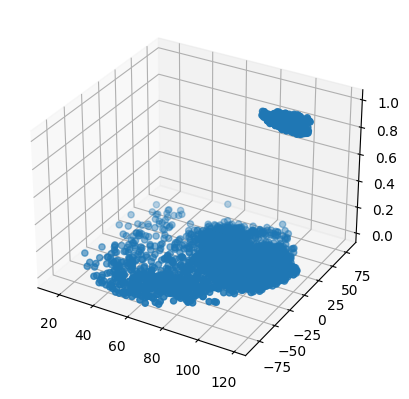

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(newEV,newLA[:,0],hr)

[[0.32193549]]
[-30.94949115]


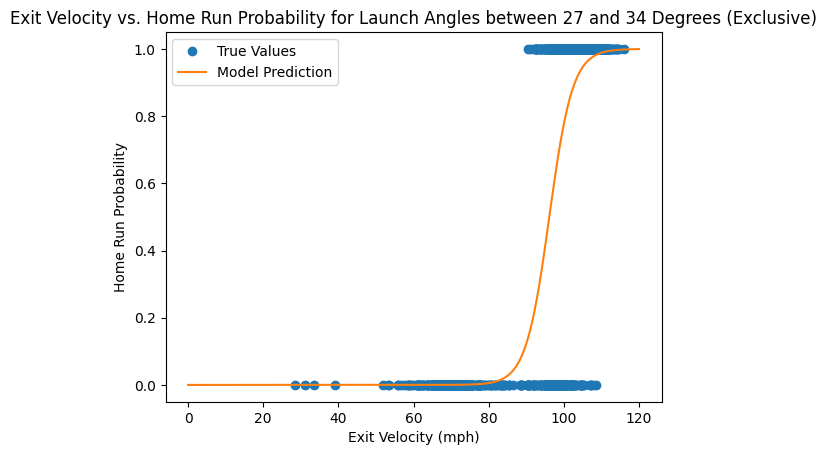

In [ ]:
EVvals = []
LAvals = []
HRvals = []
for ih in range(15193):
  if (newLA[ih,0] > 27) and (newLA[ih,0] < 34):
    LAvals.append(newLA[ih,0])
    EVvals.append(newEV[ih])
    HRvals.append(hr[ih])

EVvals2 = np.array(EVvals)
clf.fit(EVvals2.reshape(-1,1),HRvals)

print(clf.coef_)
print(clf.intercept_)

evplot = np.linspace(0,120,40000).reshape(-1,1)

plt.plot(EVvals2, HRvals, "o", label = 'True Values')
plt.plot(evplot,clf.predict_proba(evplot)[:,1], label = 'Model Prediction')
plt.title("Exit Velocity vs. Home Run Probability for Launch Angles between 27 and 34 Degrees (Exclusive)")
plt.xlabel("Exit Velocity (mph)")
plt.ylabel("Home Run Probability")
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Asks User for Inputs for Exit Velocity and Launch Angle and Makes a prediction
y = np.zeros((15193,3))
y[:,0] = x[:,0]
y[:,1] = x[:,1]
y[:,2] = newLA[:,1]
clf.fit(y,hr)
print("Weights: " + str(clf.coef_))
print(' ')

# Examples
# Spencer Steer 6/26/2023, HR, Exit Velocity: 101.4, Launch Angle: 25 Degrees --> Model Says: HR
# Shohei Ohtani 6/26/2023, HR, Exit Velocity: 113.0, Launch Angle: 36 Degrees --> Model Says: HR
# J.P. Crawford 6/26/2023, HR, Exit Velocity: 94.5, Launch Angle: 25 Degrees --> Model Says: Not a HR
# Rodolfo Castro 6/05/2023, Single, Exit Velocity: 107.3, Launch Angle: 4 Degrees --> Model Says: Not a HR


userExit = float(input("Enter an Exit Velocity: "))
userAng = float(input("Enter a Launch Angle: "))

userProb = 1/(1+math.exp(-1*(clf.coef_[0,0]*userExit+ clf.coef_[0,1]*userAng + clf.coef_[0,2]*userAng**2 + clf.intercept_)))
print("The probability that this hit would be a home run is: " + str(round(userProb,3)))

Weights: [[ 0.36600326  1.93173148 -0.02844554]]
 
Enter an Exit Velocity: 107.3
Enter a Launch Angle: 4
The probability that this hit would be a home run is: 0.0


In [ ]:
# Calculates the total accuracy of the model

totalCorrect = 0

for i in range(len(x)):
    modelProb = 1/(1+math.exp(-1*(clf.coef_[0,0]*y[i,0]+ clf.coef_[0,1]*y[i,1] + clf.coef_[0,2]*y[i,2] + clf.intercept_)))
    if(math.floor(modelProb + 0.5) == hr[i]):
        totalCorrect = totalCorrect + 1

accuracy = totalCorrect/len(x)

print("The overall accuracy of the model is " + str(accuracy))


The overall accuracy of the model is 0.9602448496017904
